<h1 style="color: red">Logistic Regrassion with one feature</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

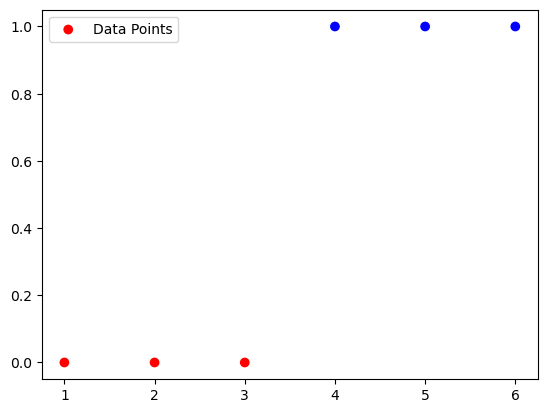

In [2]:
# Sample data with one feature
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0, 0, 1, 1, 1])

# ploting the data
plt.scatter(x, y, color=["red" if label==0 else "blue" for label in y], label="Data Points")
plt.legend()

In [3]:
# Sigmoid Function
def sigmoid(z):
    gz = 1 / (1 + np.exp(-z))
    return gz

# Gradient Descent
def gradient_descent(x, y, w, b, alpha, iterator):
    # Scaling the input features
    x_scale = x / x.max()
    m = len(x)
    
    for _ in range(iterator):
        # Calculate the linear combination of weights and input features
        z = np.dot(x_scale, w) + b
        # Apply the sigmoid function to get predicted probabilities
        f_wb = sigmoid(z)
        
        # Calculate the gradients for weights and bias
        dw = (1 / m) * np.dot(x_scale.T, (f_wb - y))
        db = (1 / m) * np.sum(f_wb - y)
        
        # Update weights and bias using gradients and learning rate
        w -= alpha * dw
        b -= alpha * db
    
    # Normalize the weights after training
    w = w / x.max()
    return w, b

In [7]:
# Initialize weights and bias
x_reshaped = x.reshape(-1, 1)  # Reshape the feature vector for dot product
w = np.random.rand(1)  # Initialize weights randomly
b = np.random.rand()   # Initialize bias randomly

alpha = 0.08       # Learning rate
iterator = 10000   # Number of iterations for gradient descent

# Call the gradient_descent function to train the model and update weights and bias
w_updated, b_updated = gradient_descent(x_reshaped, y, w, b, alpha, iterator)

# Print the updated weights and bias
print("Updated weights:", w_updated)
print("Updated bias:", b_updated)

Updated weights: [2.35392395]
Updated bias: -8.180776624917412


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [87]:
# Define the predict function
def predict(x, w, b):
    z = np.dot(x, w) + b           # Calculate the linear combination of weights and input features
    prob = sigmoid(z)              # Apply the sigmoid function to get predicted probabilities
    return np.round(prob)          # Round the probabilities to binary predictions (0 or 1)

# Test data
test = np.array([2, 4, 1.5])       # Test data with one feature
test = test.reshape(-1, 1)         # Reshape the test data for consistency with model input

# Call the predict function to get predictions for the test data
predictions = predict(test, w_updated, b_updated)
print("Predictions for test data:", predictions)

Predictions for test data: [0. 1. 0.]


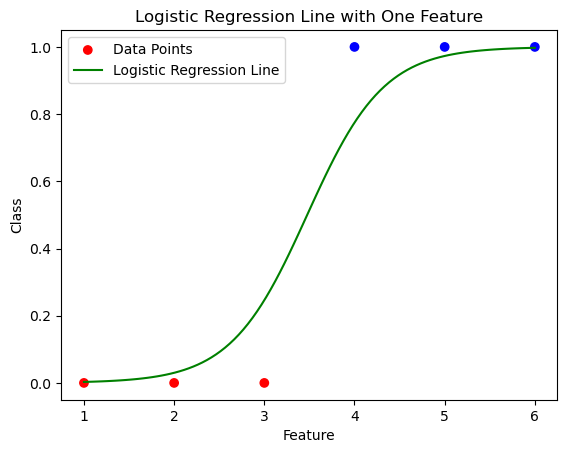

In [88]:
# Calculate the logistic regression line points
x_line = np.linspace(min(x), max(x), 100)                   # Generate points along the x-axis
y_line = sigmoid(w_updated * x_line + b_updated)            # Calculate corresponding y values using the logistic regression equation

# Plot the data points
plt.scatter(x, y, color=["red" if label == 0 else "blue" for label in y], label="Data Points")  # Color points based on their class labels

# Plot the logistic regression line
plt.plot(x_line, y_line, color='green', label='Logistic Regression Line')  # Plot the logistic regression line

# Add labels and title to the plot
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('Logistic Regression Line with One Feature')
plt.legend()
plt.show()  # Display the plot